In [1]:
################ For testing purposes only ################
try:
   testMode
except NameError:
   testMode = False

try:
    alignmentFile
except NameError:
   # NOTE: this is for a local example. Based on file placement, you may have to change this path
    alignmentFile = os.getcwd() + "/../chr17.7500000-7515000.sam"

In [2]:
import os 

from bdgenomics.adam.adamContext import ADAMContext
from bdgenomics.adam.rdd import AlignmentDataset, CoverageDataset

from bdgenomics.mango.alignments import *
import matplotlib.pyplot as plt

# Load in Alignment Data

In [3]:
try:
   ac
except NameError:
   ac = ADAMContext(spark)

# load file
alignment = ac.loadAlignments(alignmentFile)

## Create Summary for Alignment Data

In [4]:
ad = AlignmentSummary(spark, ac, alignment, sample=0.1)

In [5]:
indels = ad.getIndelDistribution(bin_size=500)


Computing Indel distributions...


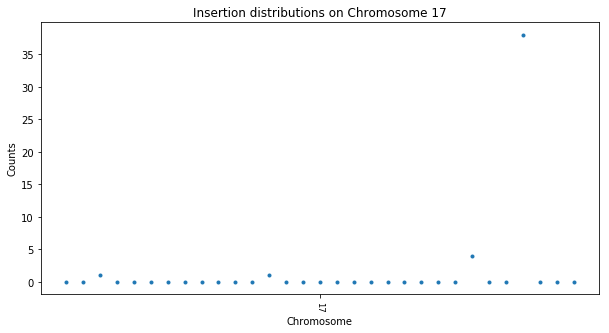

In [7]:
ax, results = indels.plot(plotType="I", testMode=testMode)

if (ax != None):
    ax.set_title("Insertion distributions on Chromosome 17")
    ax.set_xlabel("Chromosome")
    ax.set_ylabel("Counts")
    plt.show()

## Draw Coverage Distribution for Alignment Data

In [8]:
cov = ad.getCoverageDistribution(bin_size=1)

Computing coverage distributions...


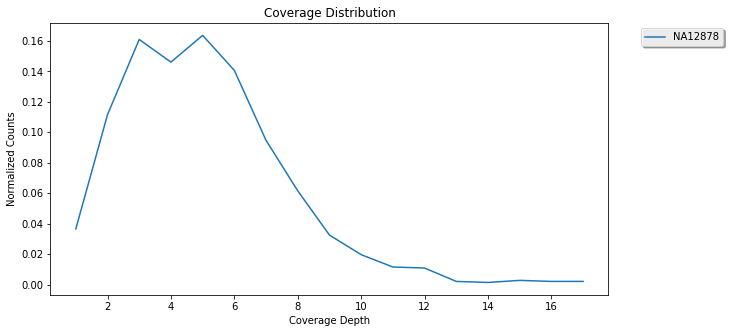

In [9]:
ax, data = cov.plotDistributions(testMode=testMode)

if (ax != None and not testMode):
    ax.set_title("Coverage Distribution")
    ax.set_xlabel("Coverage Depth")
    ax.set_ylabel("Normalized Counts")
    plt.show()

## Draw Fragment Distribution for Alignment Data

In [10]:
fragments = ad.getFragmentDistribution()

Computing fragment distributions...


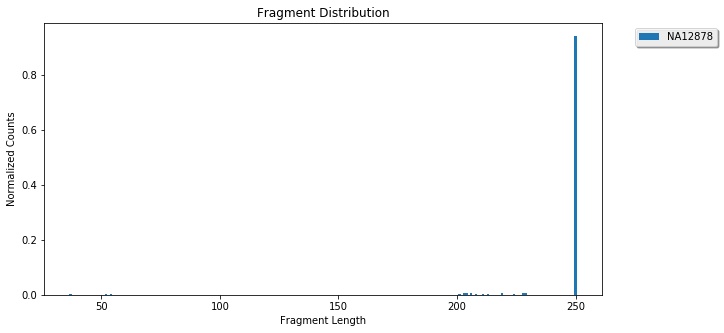

In [11]:
ax, data = fragments.plotDistributions(bar=True, testMode=testMode)

if (ax != None and not testMode):
    ax.set_title("Fragment Distribution")
    ax.set_xlabel("Fragment Length")
    ax.set_ylabel("Normalized Counts")
    plt.show()

## Draw Mapping Quality Distribution for Alignment Data

In [13]:
mapq = ad.getMapQDistribution()

Computing MapQ distributions...


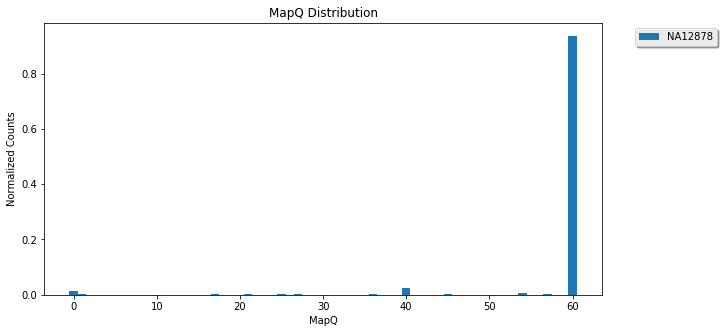

In [14]:
ax, data = mapq.plotDistributions(bar=True, testMode=testMode)

if (ax != None and not testMode):
    ax.set_title("MapQ Distribution")
    ax.set_xlabel("MapQ")
    ax.set_ylabel("Normalized Counts")
    plt.show()